In [1]:
from netCDF4 import Dataset

import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot

#data loaded and saved in EDA.ipynb
aq_monthly_df = xr.open_dataset("./data/aq_monthly_data.nc")


In [2]:
!pip install statsmodels

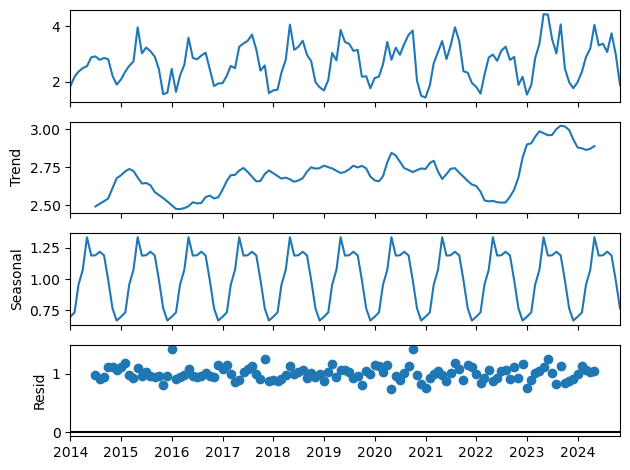

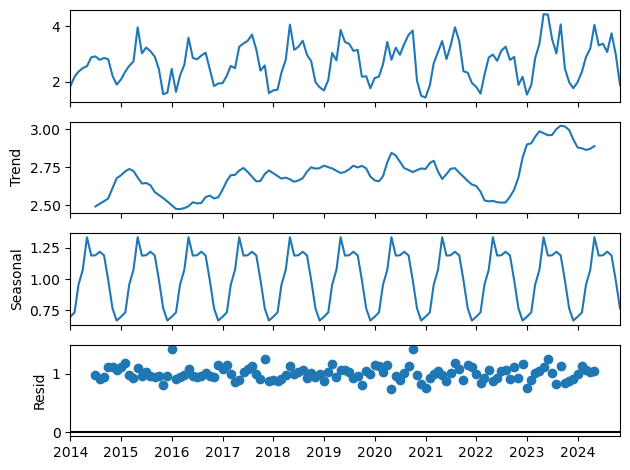

In [3]:
#time series analysis of air quality throughout year
#arima model, predict next values
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose 
from pandas.plotting import autocorrelation_plot
data = aq_monthly_df['pm25'].groupby('time.date').mean().to_pandas().asfreq('MS')
# ETS Decomposition 
sd = seasonal_decompose(data,model ='multiplicative') 
  
# ETS plot  
sd.plot() 

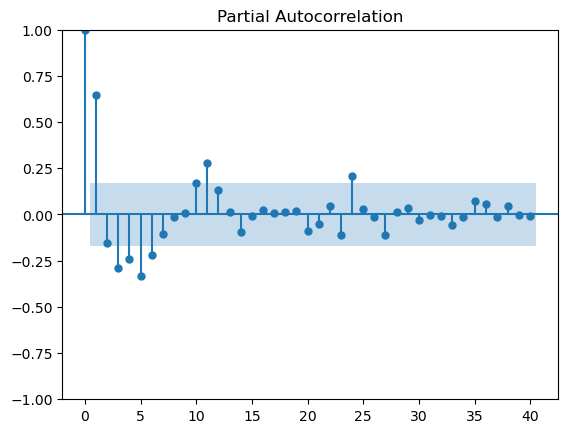

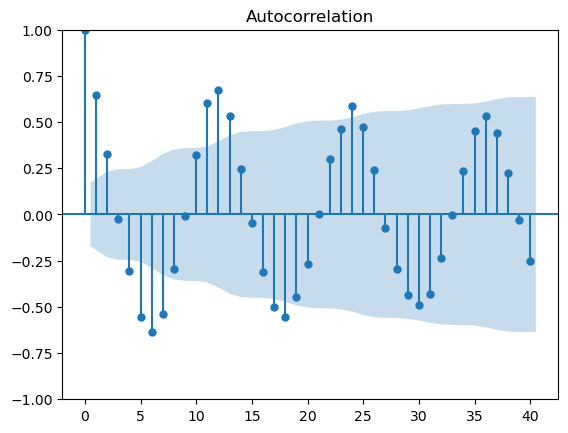

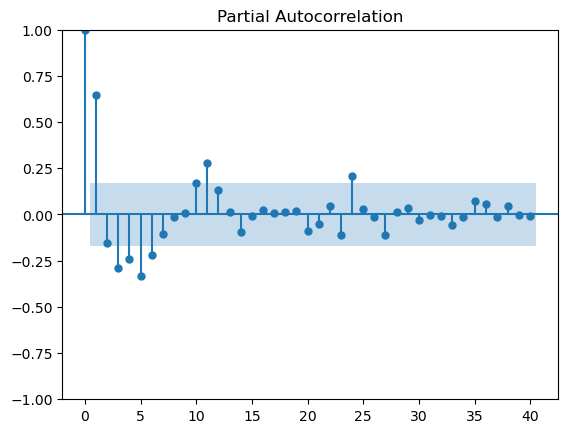

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data, lags=40)
plot_pacf(data, lags=40)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

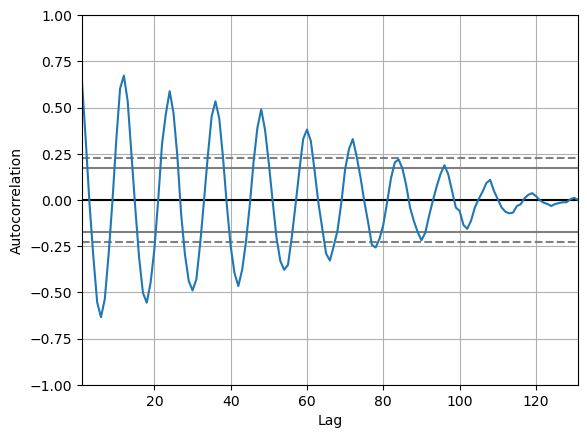

In [5]:
autocorrelation_plot(data)
#pyplot.show()

In [6]:
#add in features for prediction

model = ARIMA(data, order=(12,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  131
Model:                ARIMA(12, 1, 0)   Log Likelihood                 -67.793
Date:                Thu, 23 Jan 2025   AIC                            161.586
Time:                        11:55:40   BIC                            198.864
Sample:                    01-01-2014   HQIC                           176.733
                         - 11-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.080     -7.859      0.000      -0.785      -0.472
ar.L2         -0.5924      0.112     -5.298      0.000      -0.812      -0.373
ar.L3         -0.6660      0.116     -5.744      0.0

<Axes: xlabel='date'>

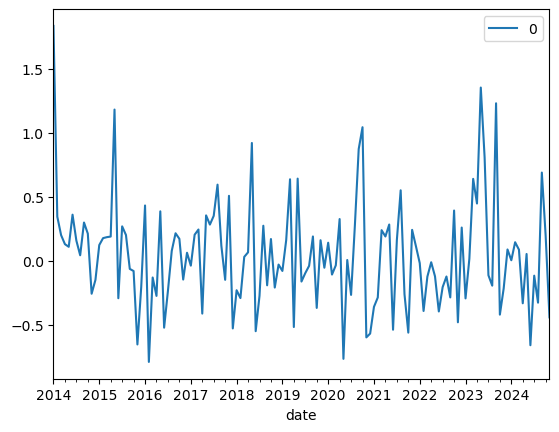

In [7]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
#pyplot.show()

<Axes: ylabel='Density'>

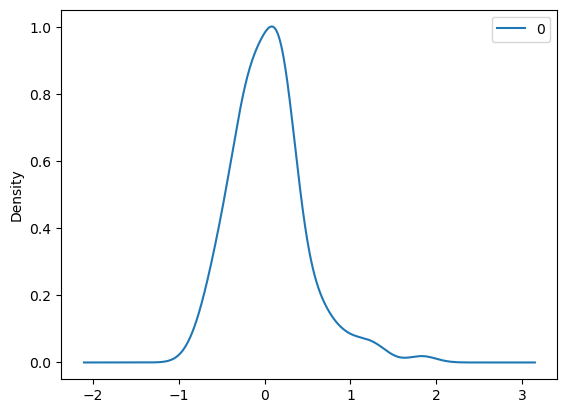

In [8]:
# density plot of residuals
residuals.plot(kind='kde')
#pyplot.show()

In [9]:
# summary stats of residuals
print(residuals.describe())

                0
count  131.000000
mean     0.048799
std      0.429431
min     -0.791945
25%     -0.233686
50%      0.029943
75%      0.239982
max      1.836546
